In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# EDA

In [160]:
zmt = pd.read_csv('./zomato.csv')

In [161]:
zmt.shape

(51717, 17)

In [162]:
zmt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Cleaning

In [163]:
zmt.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

 #### 1. Renaming the columns
First let's get rid of confusing long column names  
* listed_in(type) -> rest_category
* listed_in(city) -> city
* approx_cost(for two people) -> cost_for_two
* rate -> rating
  

In [164]:
zmt.rename(columns={"listed_in(type)":"rest_category", "listed_in(city)":"city", "approx_cost(for two people)":"cost_for_two", "rate":"rating"}, inplace=True)

In [165]:
zmt.dtypes

url              object
address          object
name             object
online_order     object
book_table       object
rating           object
votes             int64
phone            object
location         object
rest_type        object
dish_liked       object
cuisines         object
cost_for_two     object
reviews_list     object
menu_item        object
rest_category    object
city             object
dtype: object

#### 2. Deleting redundant columns
Let's get rid of redundant or duplicate columns
* __'url'__ , '__address__', '__phone__', '__dish_liked'__, __'menu_item'__  are redundant for our analyses so let's remove them.

In [166]:
zmt.drop(columns=['url', 'address', 'phone', 'menu_item', 'dish_liked'], inplace=True)

In [167]:
zmt.dtypes

name             object
online_order     object
book_table       object
rating           object
votes             int64
location         object
rest_type        object
cuisines         object
cost_for_two     object
reviews_list     object
rest_category    object
city             object
dtype: object

In [168]:
zmt[['rest_type', 'rest_category']]

,rest_type,rest_category
0,Casual Dining,Buffet
1,Casual Dining,Buffet
2,"Cafe, Casual Dining",Buffet
3,Quick Bites,Buffet
4,Casual Dining,Buffet
...,...,...
51712,Bar,Pubs and bars
51713,Bar,Pubs and bars
51714,Bar,Pubs and bars
51715,Bar,Pubs and bars


In [169]:
print(zmt.rest_type.unique())
print(zmt.rest_category.unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

In [170]:
zmt[['rest_type', 'rest_category']].isna().sum()

rest_type        227
rest_category      0
dtype: int64

* __rest_type__ and __rest_category__ give the same type of information so we can keep one of them, in this case since __rest_category__ doesn't have missing values let's keep it.

In [171]:
zmt.drop(columns="rest_type", inplace=True)

#### 3. Dropping duplicates.

In [172]:
zmt.duplicated().sum()

72

In [173]:
zmt.drop_duplicates(inplace=True, ignore_index=True)

In [174]:
zmt.shape

(51645, 11)

#### 4. Removing the NaN values from the dataset

In [175]:
zmt.isna().sum()

name                0
online_order        0
book_table          0
rating           7757
votes               0
location           21
cuisines           45
cost_for_two      345
reviews_list        0
rest_category       0
city                0
dtype: int64

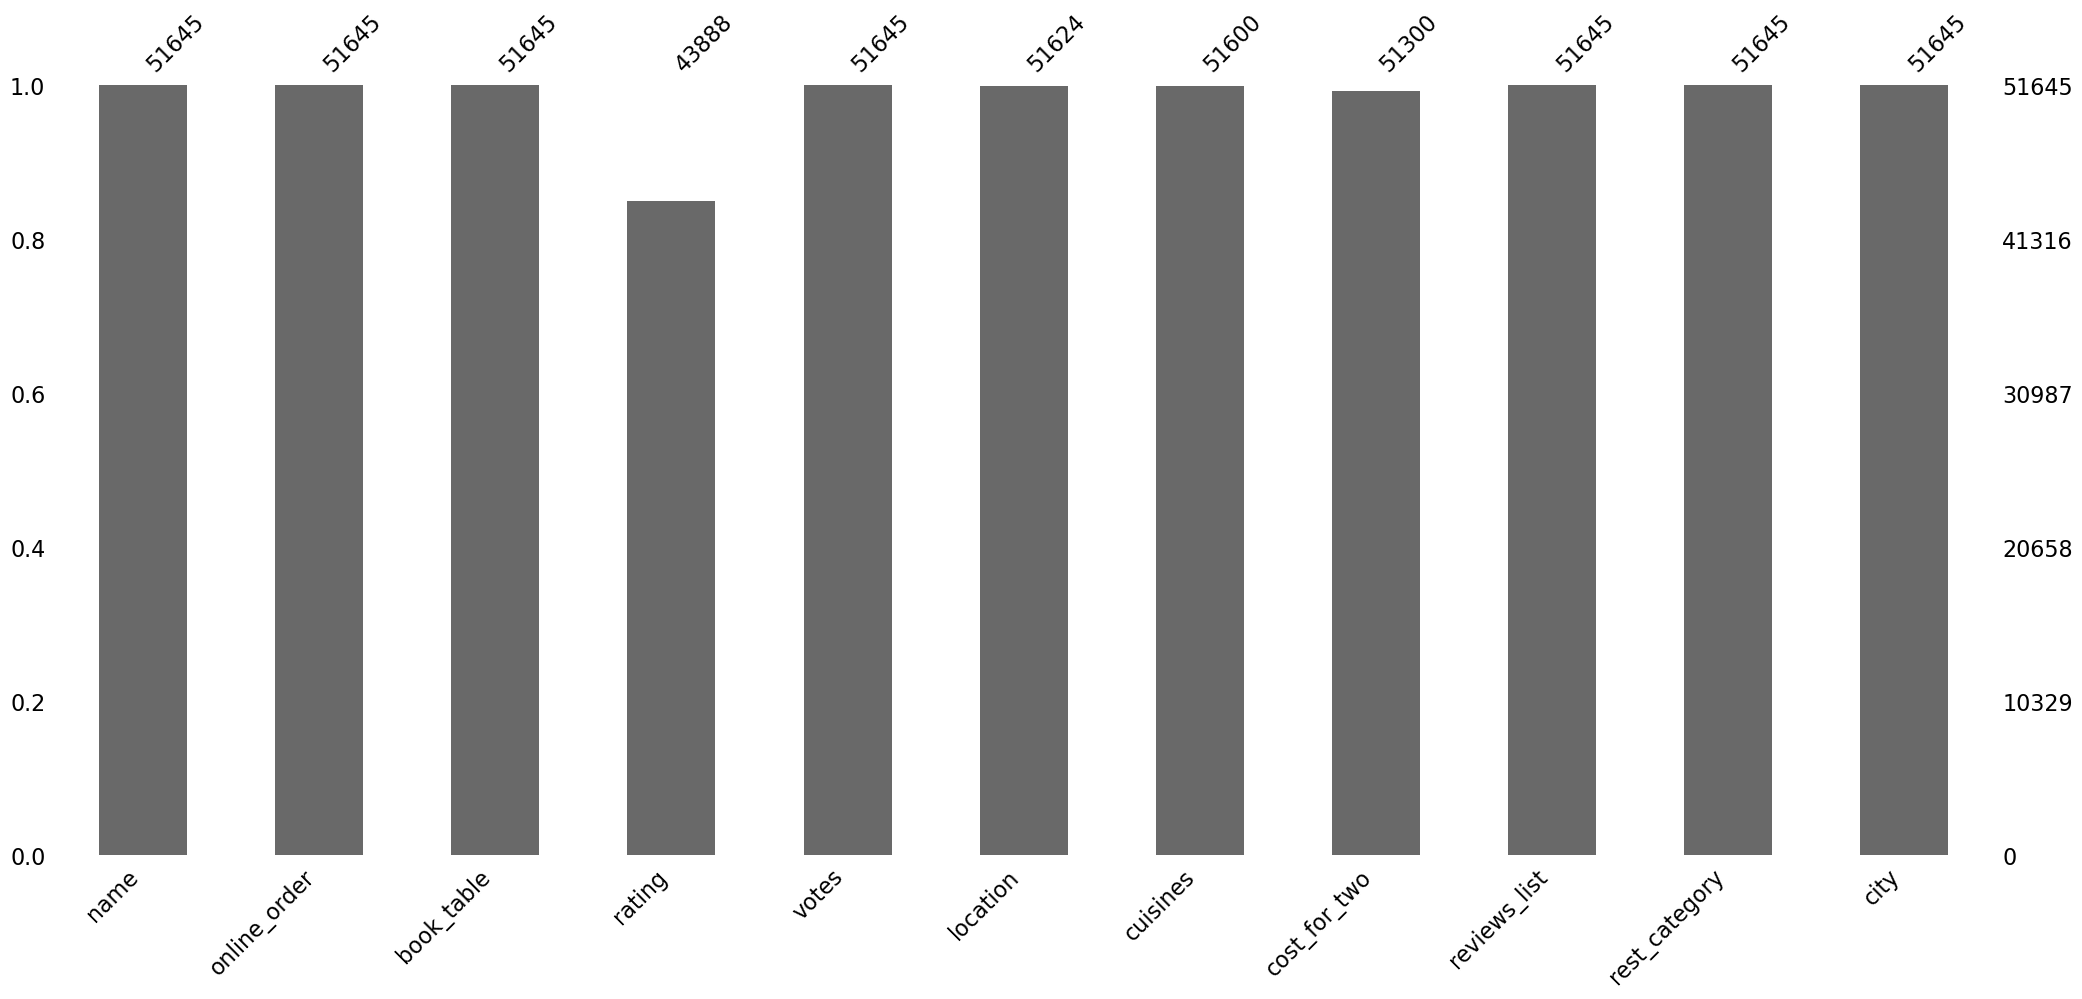

In [176]:
missingno.bar(zmt)
plt.show()

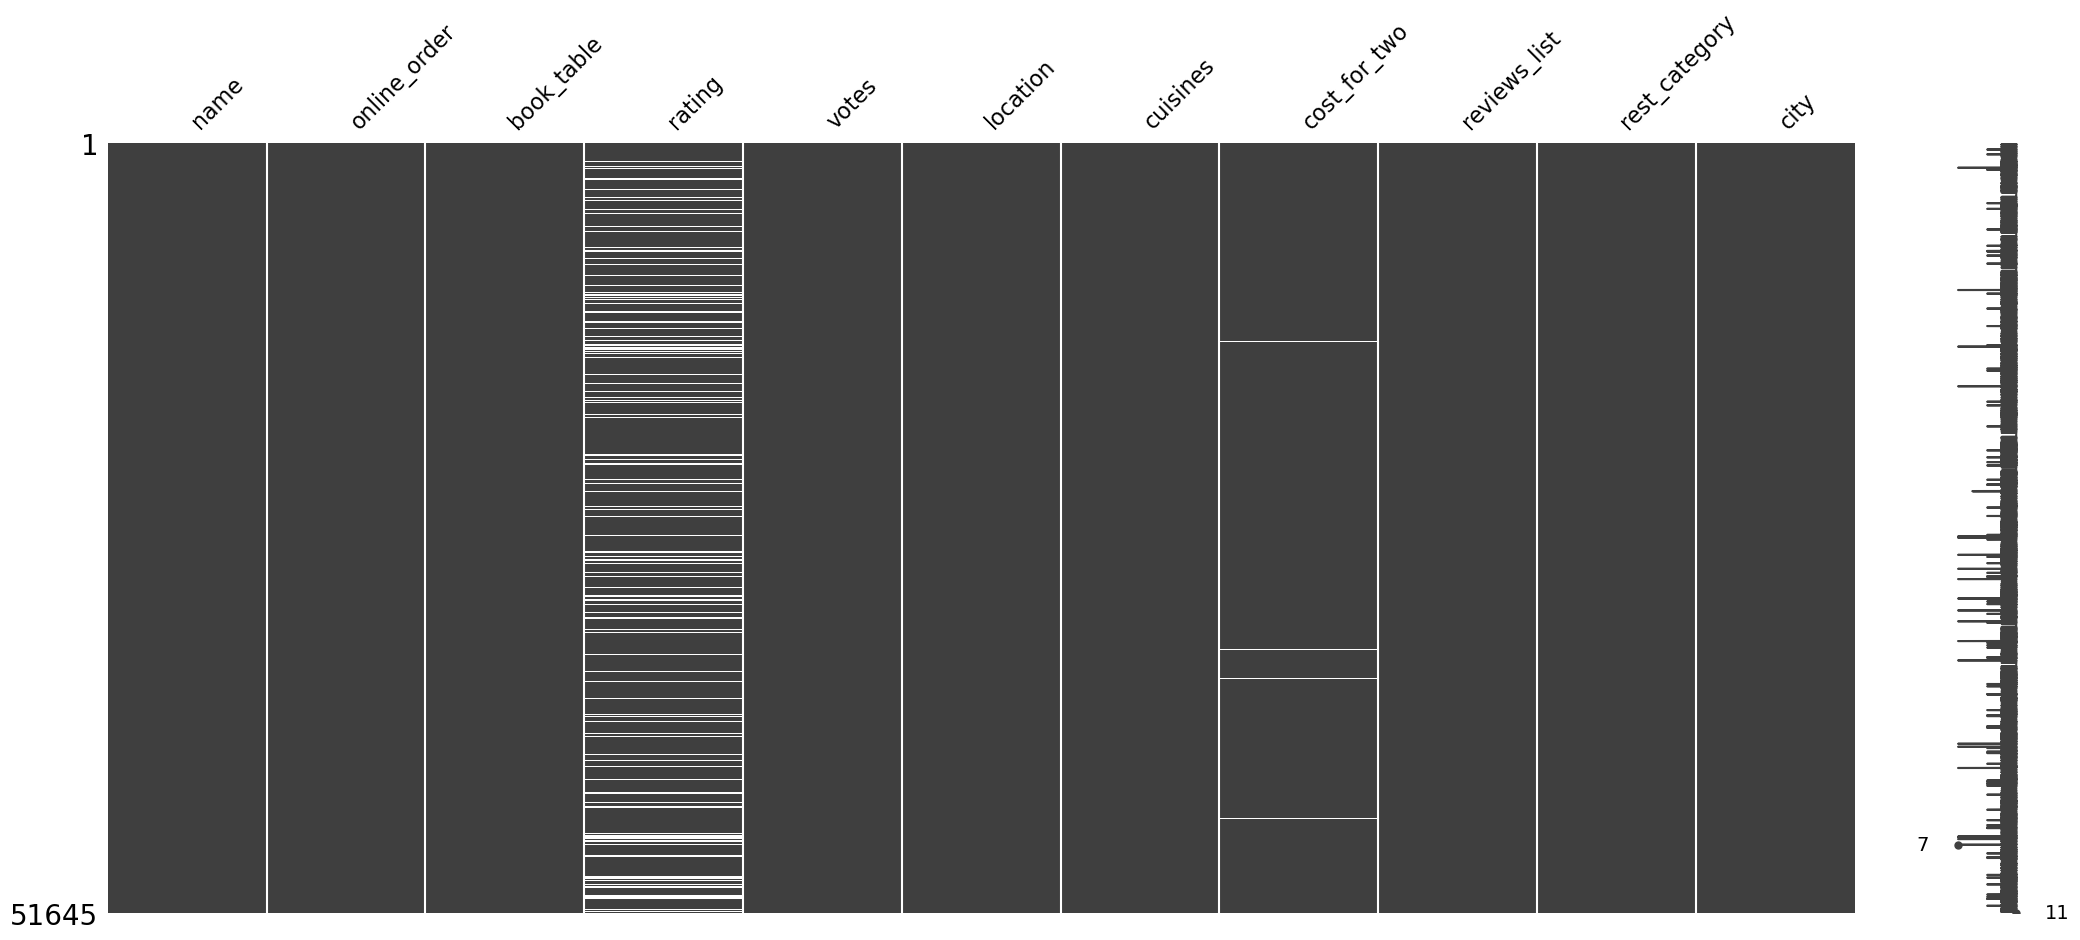

In [177]:
missingno.matrix(zmt)
plt.show()

In [178]:
zmt.isnull().mean() * 100

name              0.000000
online_order      0.000000
book_table        0.000000
rating           15.019847
votes             0.000000
location          0.040662
cuisines          0.087133
cost_for_two      0.668022
reviews_list      0.000000
rest_category     0.000000
city              0.000000
dtype: float64

* _location_  
Let's replace nan values of location with their city.

In [179]:
zmt.location.isna().sum()

21

In [180]:
zmt[['location', 'city']][zmt.location.isna()]

,location,city
1661,NaN,Bannerghatta Road
9860,NaN,BTM
13658,NaN,Electronic City
16316,NaN,HSR
26384,NaN,Kammanahalli
26470,NaN,Koramangala 4th Block
27623,NaN,Koramangala 4th Block
28561,NaN,Koramangala 4th Block
29247,NaN,Koramangala 5th Block
30552,NaN,Koramangala 5th Block


In [181]:
zmt.location.fillna(zmt.city, inplace=True)

In [182]:
zmt.location.unique(), zmt.city.unique()

(array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
        'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
        'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
        'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
        'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
        'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
        'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
        'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
        'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
        'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
        'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
        'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
        'St. Marks Road', 'Cunningham Road', 'Race Course Road',
        'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
        'Ejipura'

In [183]:
del zmt['city']

In [184]:
zmt.isnull().mean() * 100

name              0.000000
online_order      0.000000
book_table        0.000000
rating           15.019847
votes             0.000000
location          0.000000
cuisines          0.087133
cost_for_two      0.668022
reviews_list      0.000000
rest_category     0.000000
dtype: float64

* _rating_   

In [185]:
zmt.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Replace _'New'_ with possible lowest rating.  
Replace nans with the mean of ratings of restaurants in the same location with the same category

In [186]:
def handle_rate(value):
    if value == 'NEW':
        return float(1)
    elif value == '-':
        return np.nan
    else :
        return float(str(value).split('/')[0])
    
zmt['rating'] = zmt['rating'].apply(handle_rate)

In [187]:
cat_loc_rate = zmt.groupby(['location', 'rest_category'])['rating'].mean()

mask = zmt['rating'].isna()
zmt.loc[mask, 'rating']  = zmt.loc[mask].apply(lambda row: cat_loc_rate[row['location'], row['rest_category']], axis=1)

In [188]:
zmt.isnull().sum()

name               0
online_order       0
book_table         0
rating            15
votes              0
location           0
cuisines          45
cost_for_two     345
reviews_list       0
rest_category      0
dtype: int64

As we can see there're still restaurants with nan rating values. Those are the restaurants for which there doesn't exists a restaurant in the same location with the same category. Let's replace the nan values of rating of those restaurants with average rating '2.5'.


In [189]:
zmt['rating'].fillna(value=2.5, inplace=True)

In [190]:
zmt.isnull().mean() * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rating           0.000000
votes            0.000000
location         0.000000
cuisines         0.087133
cost_for_two     0.668022
reviews_list     0.000000
rest_category    0.000000
dtype: float64

* _cuisines_  
Only very small proportion is nan (0.08%) so we can drop nans

In [191]:
zmt = zmt[zmt['cuisines'].notna()]

In [192]:
zmt.isnull().mean() * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rating           0.000000
votes            0.000000
location         0.000000
cuisines         0.000000
cost_for_two     0.618217
reviews_list     0.000000
rest_category    0.000000
dtype: float64

* _cost_for_two_  
Let's replace nan values with mean cost for two of the restaurants which have the same location and rating.

In [193]:
zmt.cost_for_two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [194]:
zmt.cost_for_two = zmt.cost_for_two.str.replace(',', '').astype('float')

In [195]:
zmt.cost_for_two

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51640    1500.0
51641     600.0
51642    2000.0
51643    2500.0
51644    1500.0
Name: cost_for_two, Length: 51600, dtype: float64

In [196]:
ct_rt_cost = zmt.groupby(['location', 'rating']).apply(lambda row: row.cost_for_two.mean())

mask = zmt.cost_for_two.isna()
zmt.loc[mask, 'cost_for_two'] = zmt[mask].apply(lambda row: ct_rt_cost[row['location'], row['rating']], axis=1) 

In [197]:
zmt.isna().sum()

name             0
online_order     0
book_table       0
rating           0
votes            0
location         0
cuisines         0
cost_for_two     5
reviews_list     0
rest_category    0
dtype: int64

In [198]:
zmt['cost_for_two'].fillna(round(zmt['cost_for_two'].mean(),1),inplace=True)

In [199]:
zmt.isna().sum()

name             0
online_order     0
book_table       0
rating           0
votes            0
location         0
cuisines         0
cost_for_two     0
reviews_list     0
rest_category    0
dtype: int64

## Data Visualization

In [200]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51600 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           51600 non-null  object 
 1   online_order   51600 non-null  object 
 2   book_table     51600 non-null  object 
 3   rating         51600 non-null  float64
 4   votes          51600 non-null  int64  
 5   location       51600 non-null  object 
 6   cuisines       51600 non-null  object 
 7   cost_for_two   51600 non-null  float64
 8   reviews_list   51600 non-null  object 
 9   rest_category  51600 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


**1. Restaurants distribution by online delivery and table booking**

In [201]:
dist_rest_online_order = (zmt.online_order.value_counts() / zmt.shape[0] * 100).round(2)
dist_rest_book_table = (zmt.book_table.value_counts() / zmt.shape[0] * 100).round(2)
dist_rest_online_order

online_order
Yes    58.86
No     41.14
Name: count, dtype: float64

In [202]:
crest_onln_del_tbl_bk = zmt[(zmt.online_order=='Yes') & (zmt.book_table=='Yes')].shape[0]

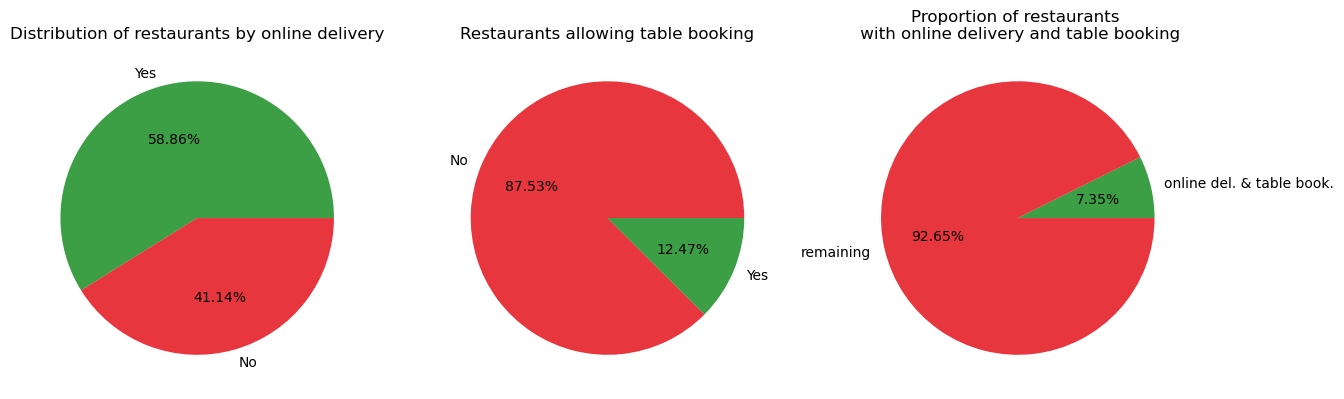

In [203]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))

ax1.pie(x = dist_rest_online_order, labels = dist_rest_online_order.index, colors = ['#078513c9', '#e3000bc9'], autopct = "%.2f%%")
ax2.pie(x = dist_rest_book_table, labels = dist_rest_book_table.index, colors = ['#e3000bc9', '#078513c9'], autopct = "%.2f%%")
ax3.pie(x=[crest_onln_del_tbl_bk, zmt.shape[0]-crest_onln_del_tbl_bk], labels=['online del. & table book.', 'remaining'], colors = ['#078513c9', '#e3000bc9'], autopct = "%.2f%%")
ax1.set_title('Distribution of restaurants by online delivery', fontdict={'fontsize':12})
ax2.set_title('Restaurants allowing table booking', fontdict={'fontsize':12})
a = ax3.set_title('Proportion of restaurants \n with online delivery and table booking')

*Color Theory*  
Here it's better to use semantic colors: green to highlight good proportion of retaurants and red for the opposite.

 From pieplot we can see that more then half of the restaurants provide online delivery, but just 12.47% are allowing table booking. 7.36% of restaurants have both online delivery and table booking.

In [204]:
loc_cres = zmt.location.value_counts().sort_values(ascending=False)
loc_cres

location
BTM                      5109
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2232
Whitefield               2133
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

**2. The number of restaurants by location in Bangalore**

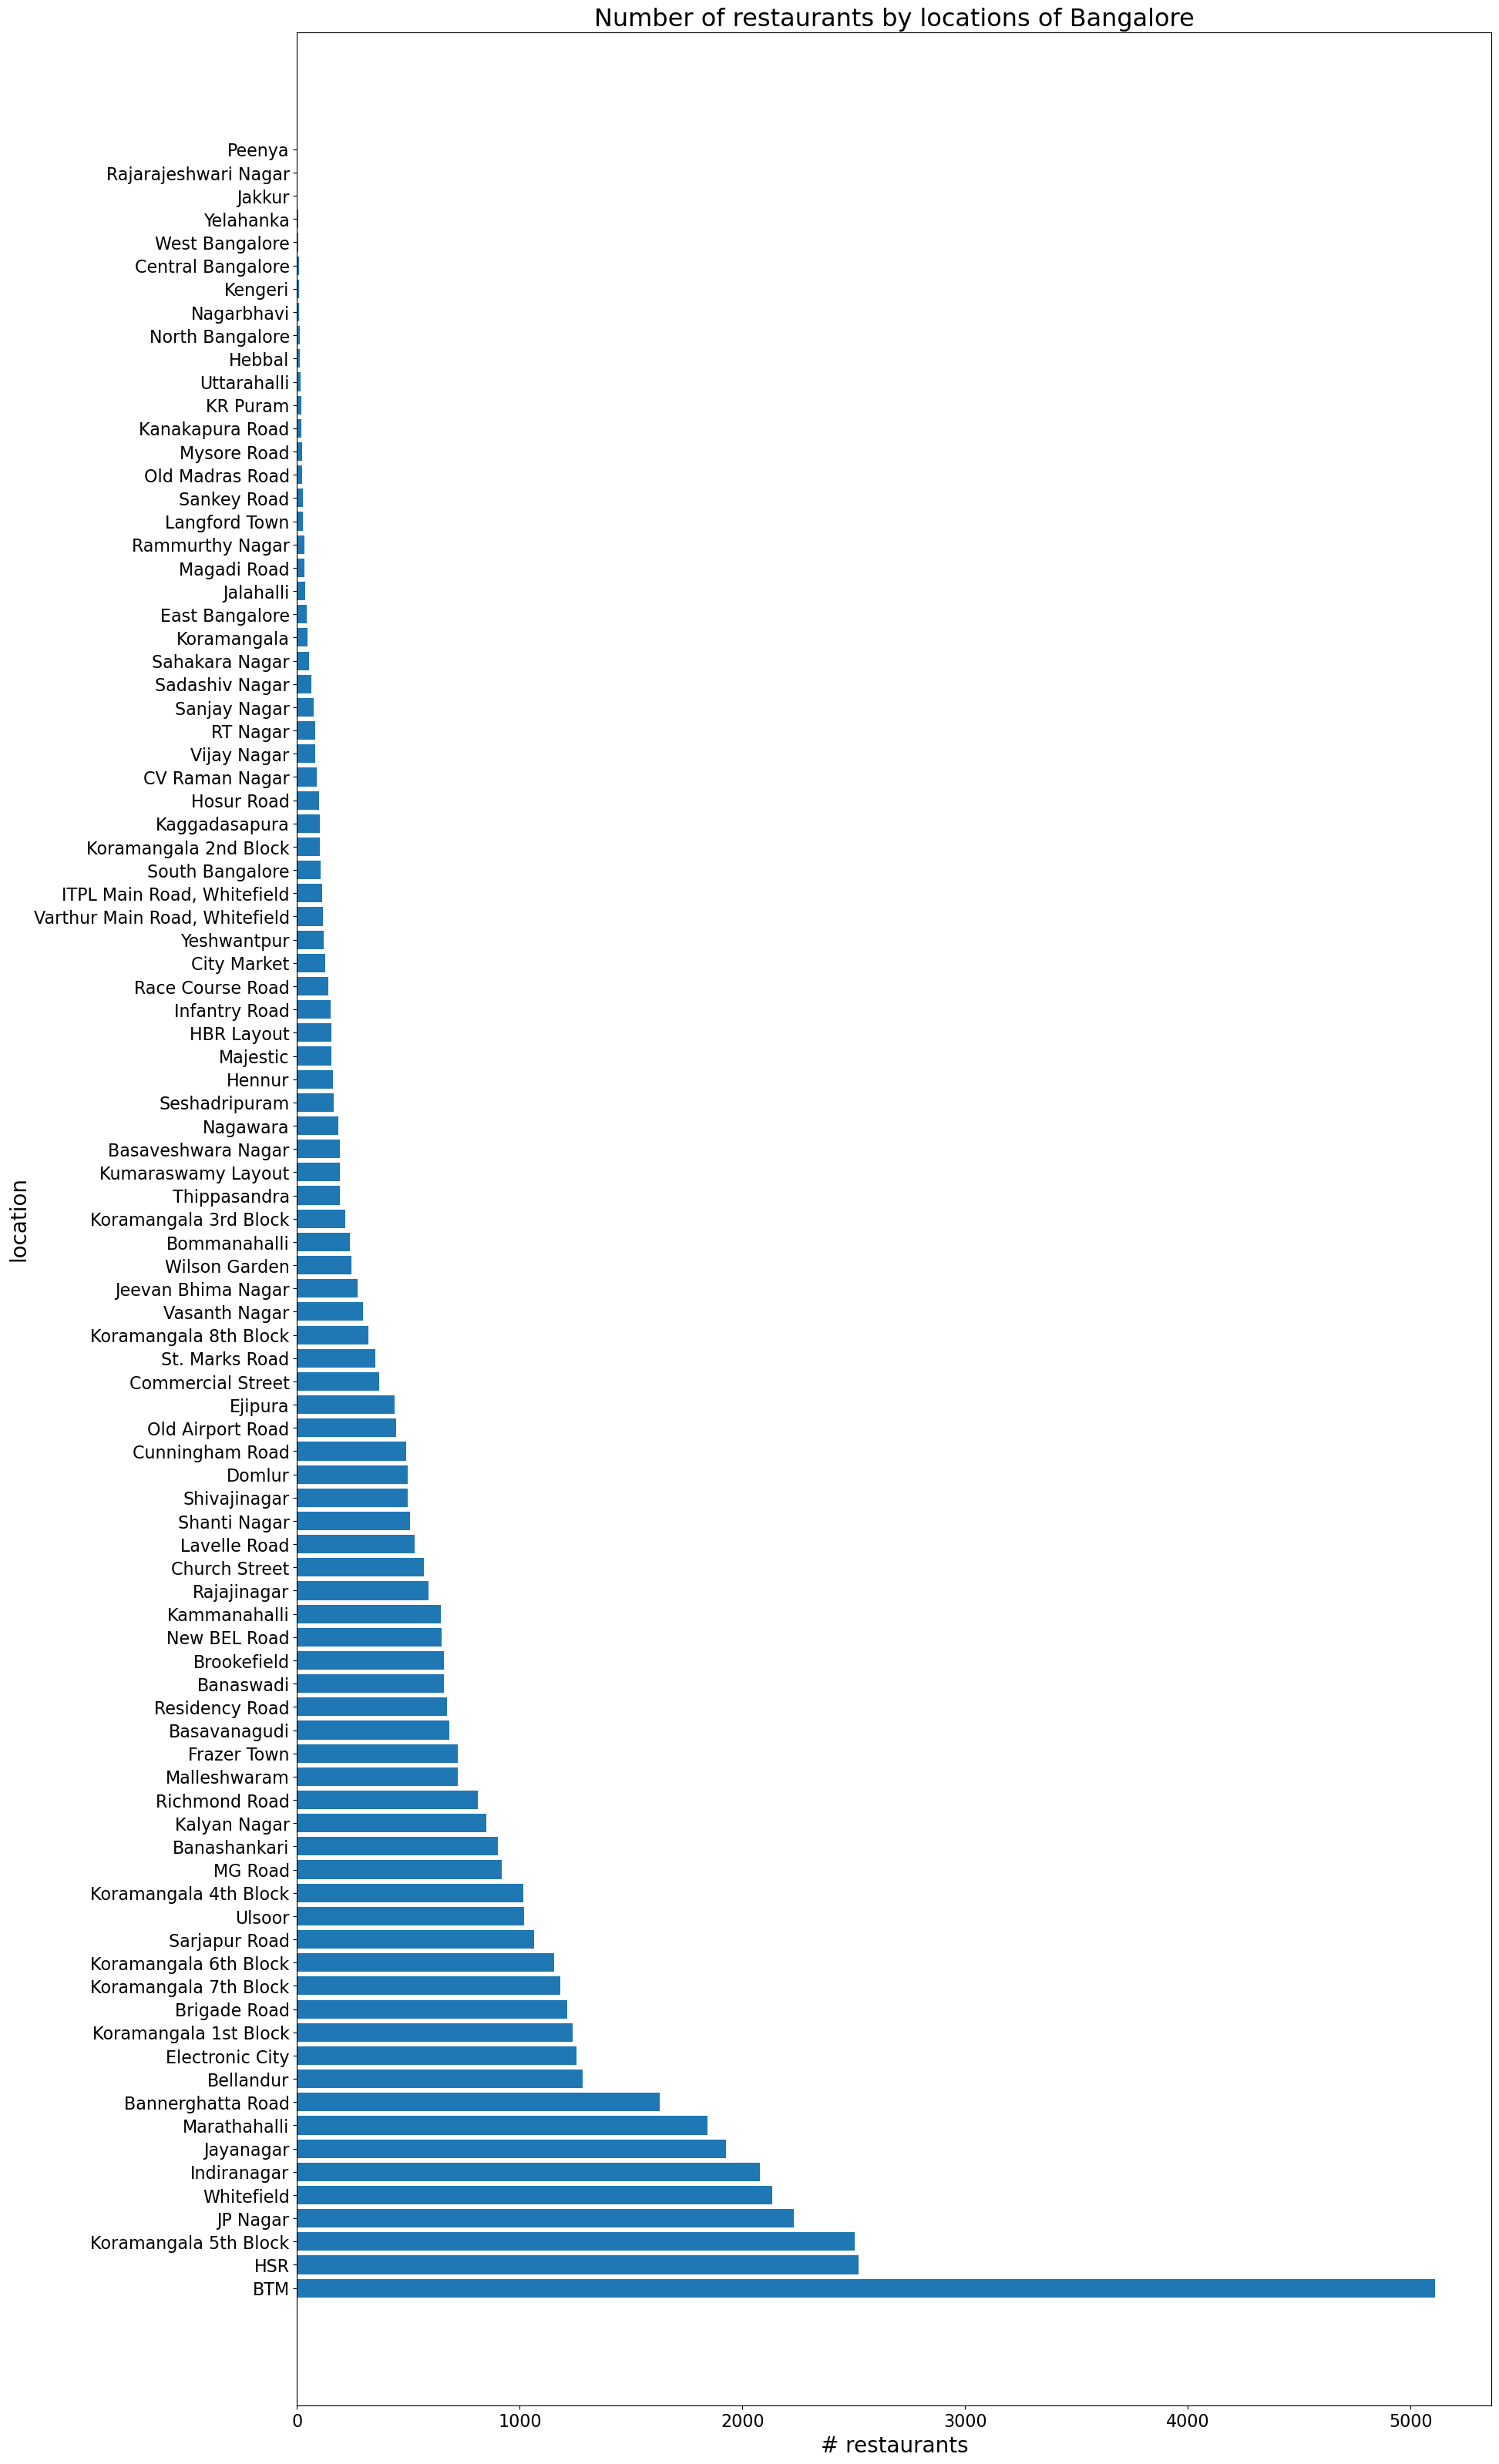

In [205]:
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=loc_cres.index, width=loc_cres.values)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Number of restaurants by locations of Bangalore', fontdict={'fontsize':23})
plt.xlabel('# restaurants', fontsize=20)
plt.ylabel('location', fontsize=20)
plt.show()

_Color Theory:_  
We've already seperated cities (categories) by bars in barchart so seperating them also by color would be _Color Overuse_.

In [206]:
loc_cres[:5]

location
BTM                      5109
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2232
Whitefield               2133
Name: count, dtype: int64

 *Top 6 locations of Bangalore by the number of restaurants :*  
1. BTM ( The vast majority of Bangalore's restaurants are located at **BTM**: 5109 restaurants)
2. HSR
3. Koramangala 5th Block
4. JP Nagar
5. Whitefield  

In [207]:
loc_cres[-5:]

location
West Bangalore          6
Yelahanka               6
Jakkur                  3
Rajarajeshwari Nagar    2
Peenya                  1
Name: count, dtype: int64

*Locations of Bangalore with minimum number of restaurants*  
* Peenya - 1
* Rajarajeshwari Nagar - 2
* Jakkur - 3
* Yelahanka - 6
* West Bangalore - 6

**3. Best and worst locations of Bangalore by restaurants' rating distribution**

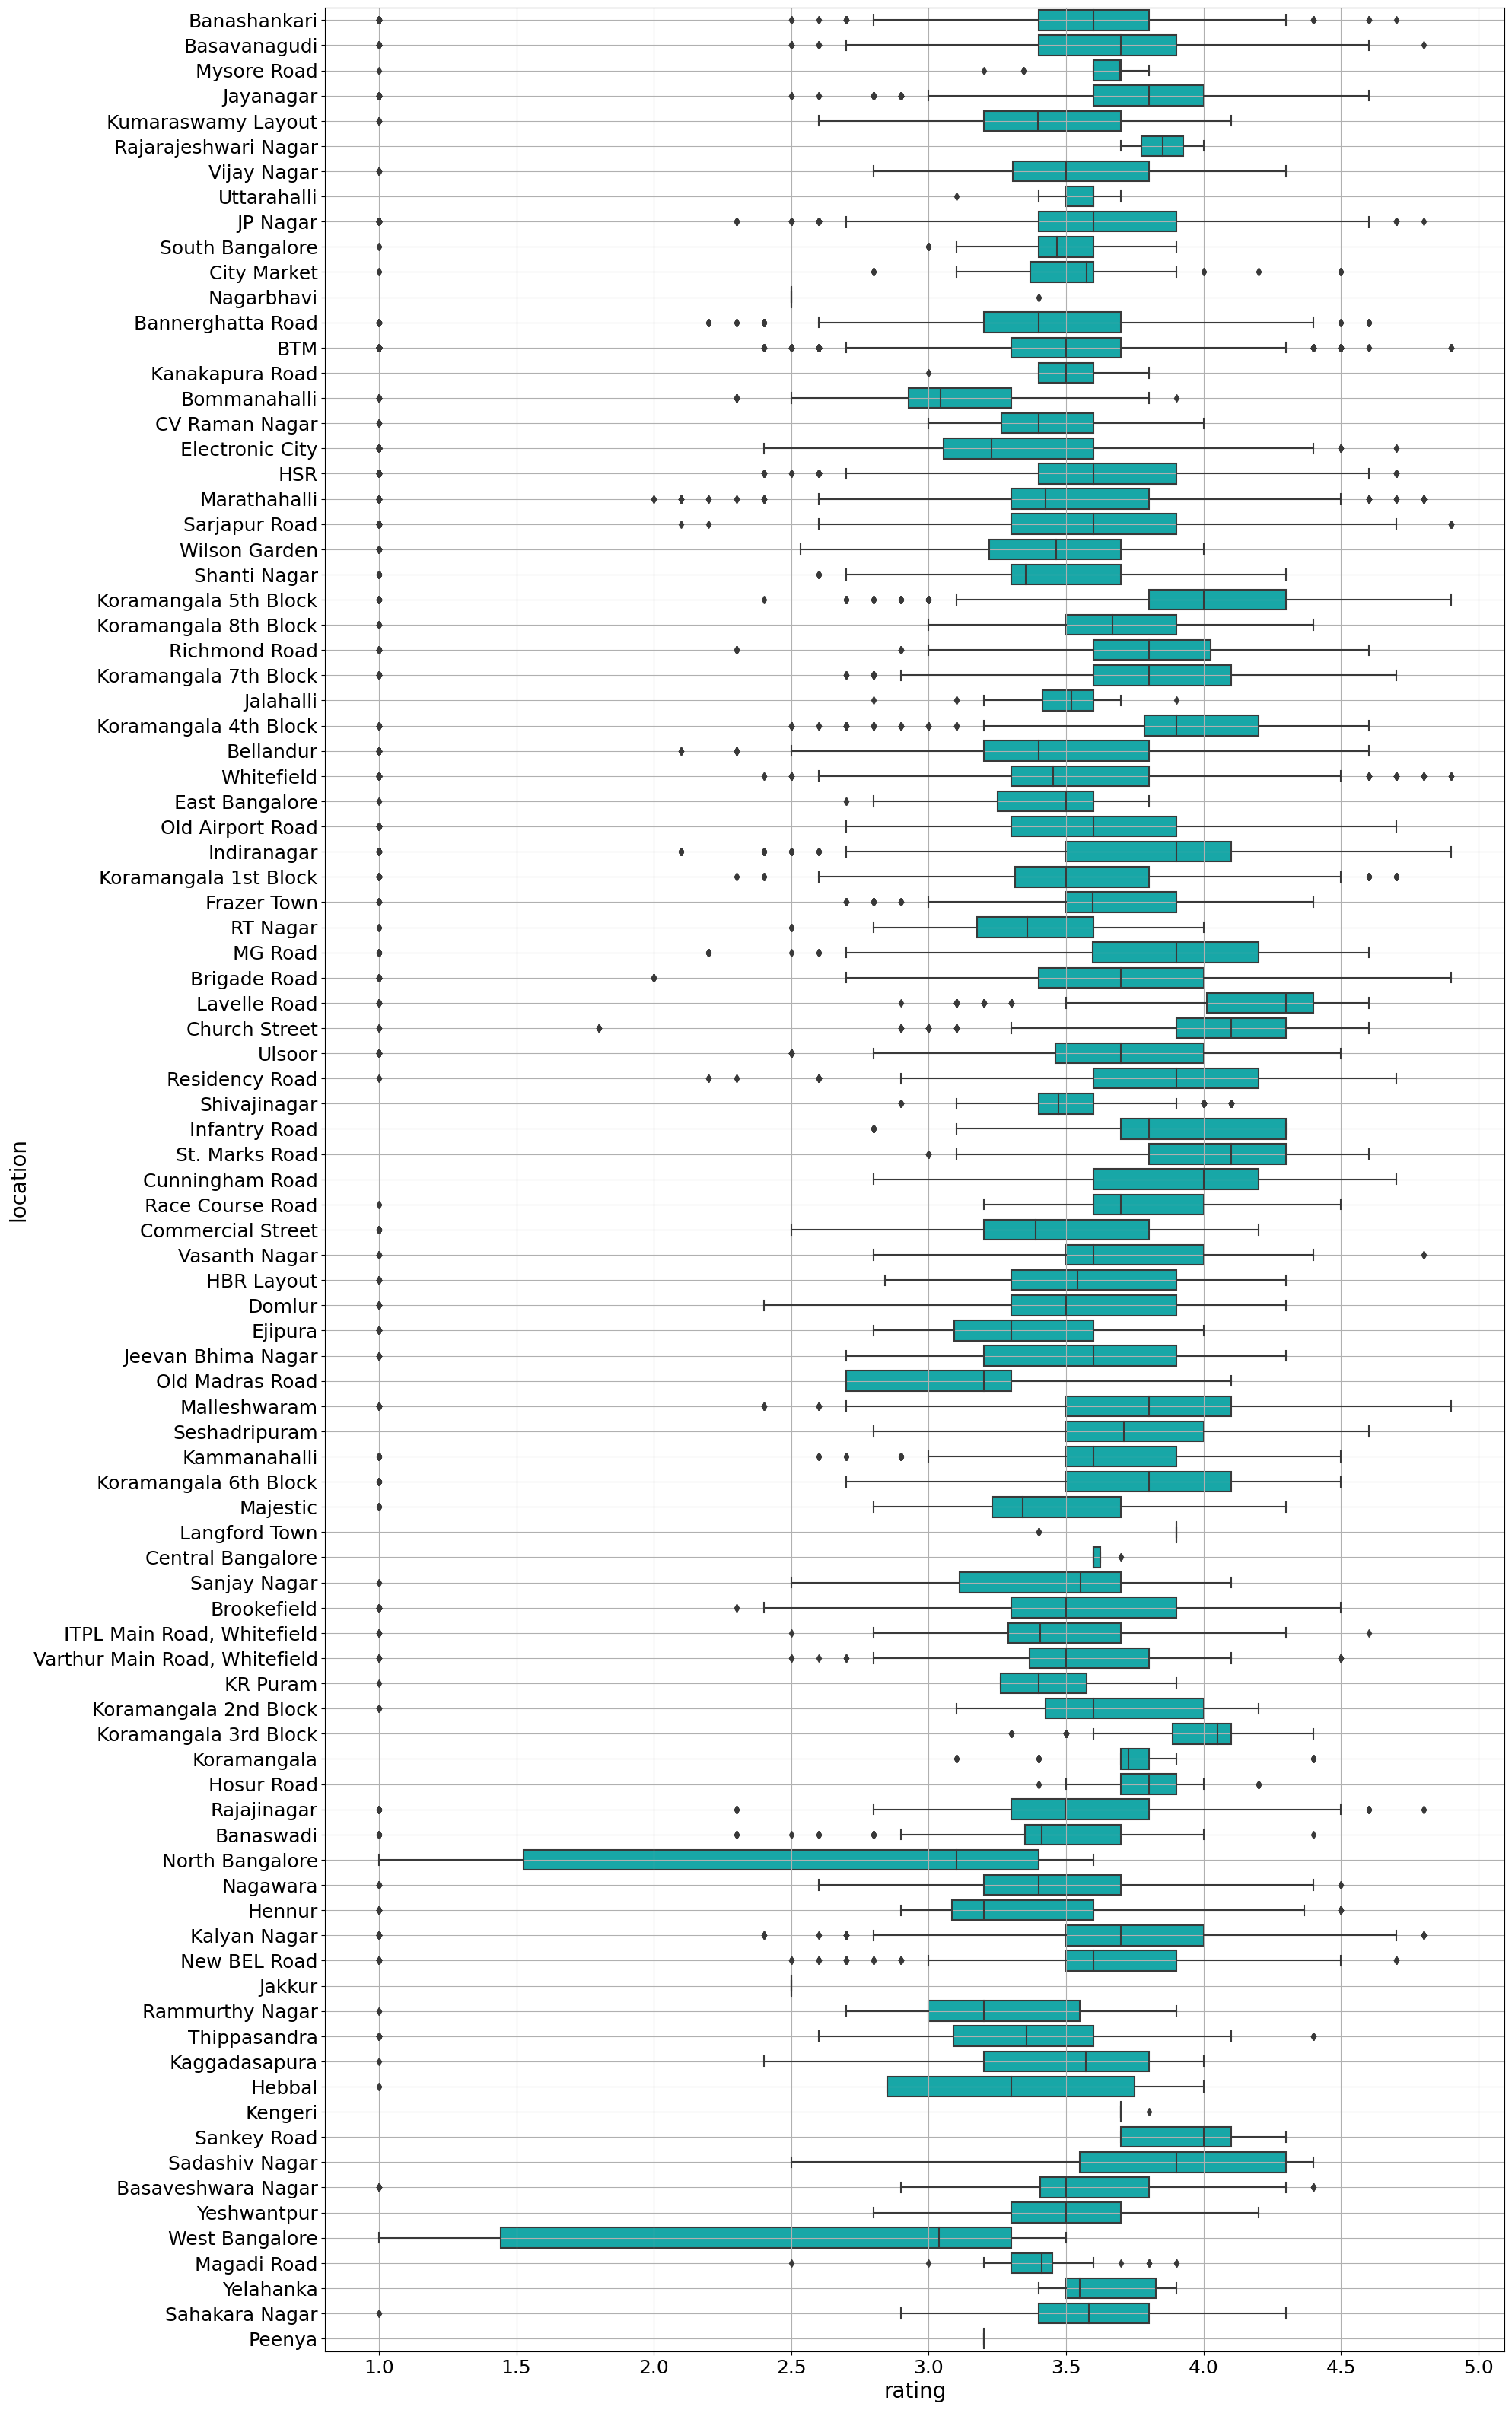

In [209]:
fig, ax = plt.subplots(1, 1, figsize = (20, 40))
b = sns.boxplot(data=zmt, x='rating', y='location', orient='h', ax=ax, color='c')
b.tick_params(labelsize=18)
plt.xlabel('rating', fontsize=20)
plt.ylabel('location', fontsize=20)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

_Color Theory_  
It's better to not separate boxplots by color as they are already in seperate rows showing different categories. 

_Best locations by the rating of restaurants:_
* Lavelle Road - __more then 75%__ of restaurants have __rating >= 4.0__
* Church Street, St. Marks Road - __more then 60%__ of restaurants have __rating >= 4.0__
* Koramangala 3rd Block - __more then 50%__ of restaurants have __rating >= 4.0__
* Koramangala 5th Block, Cunningham Road, Sankey Road - __50%__ of restaurants have __rating >= 4.0__

_Locations with restaurants having lowest rating_
* North Bangalore, West Bangalore - __nearly 50%__ of restaurants have __rating <= 3.0__ with __25%__ of restaurants having __rating between 1.0 andn 1.5__  

**3. The most expensive/cheap locations of Bangalore by restaurants' cost for two peaple indicator**

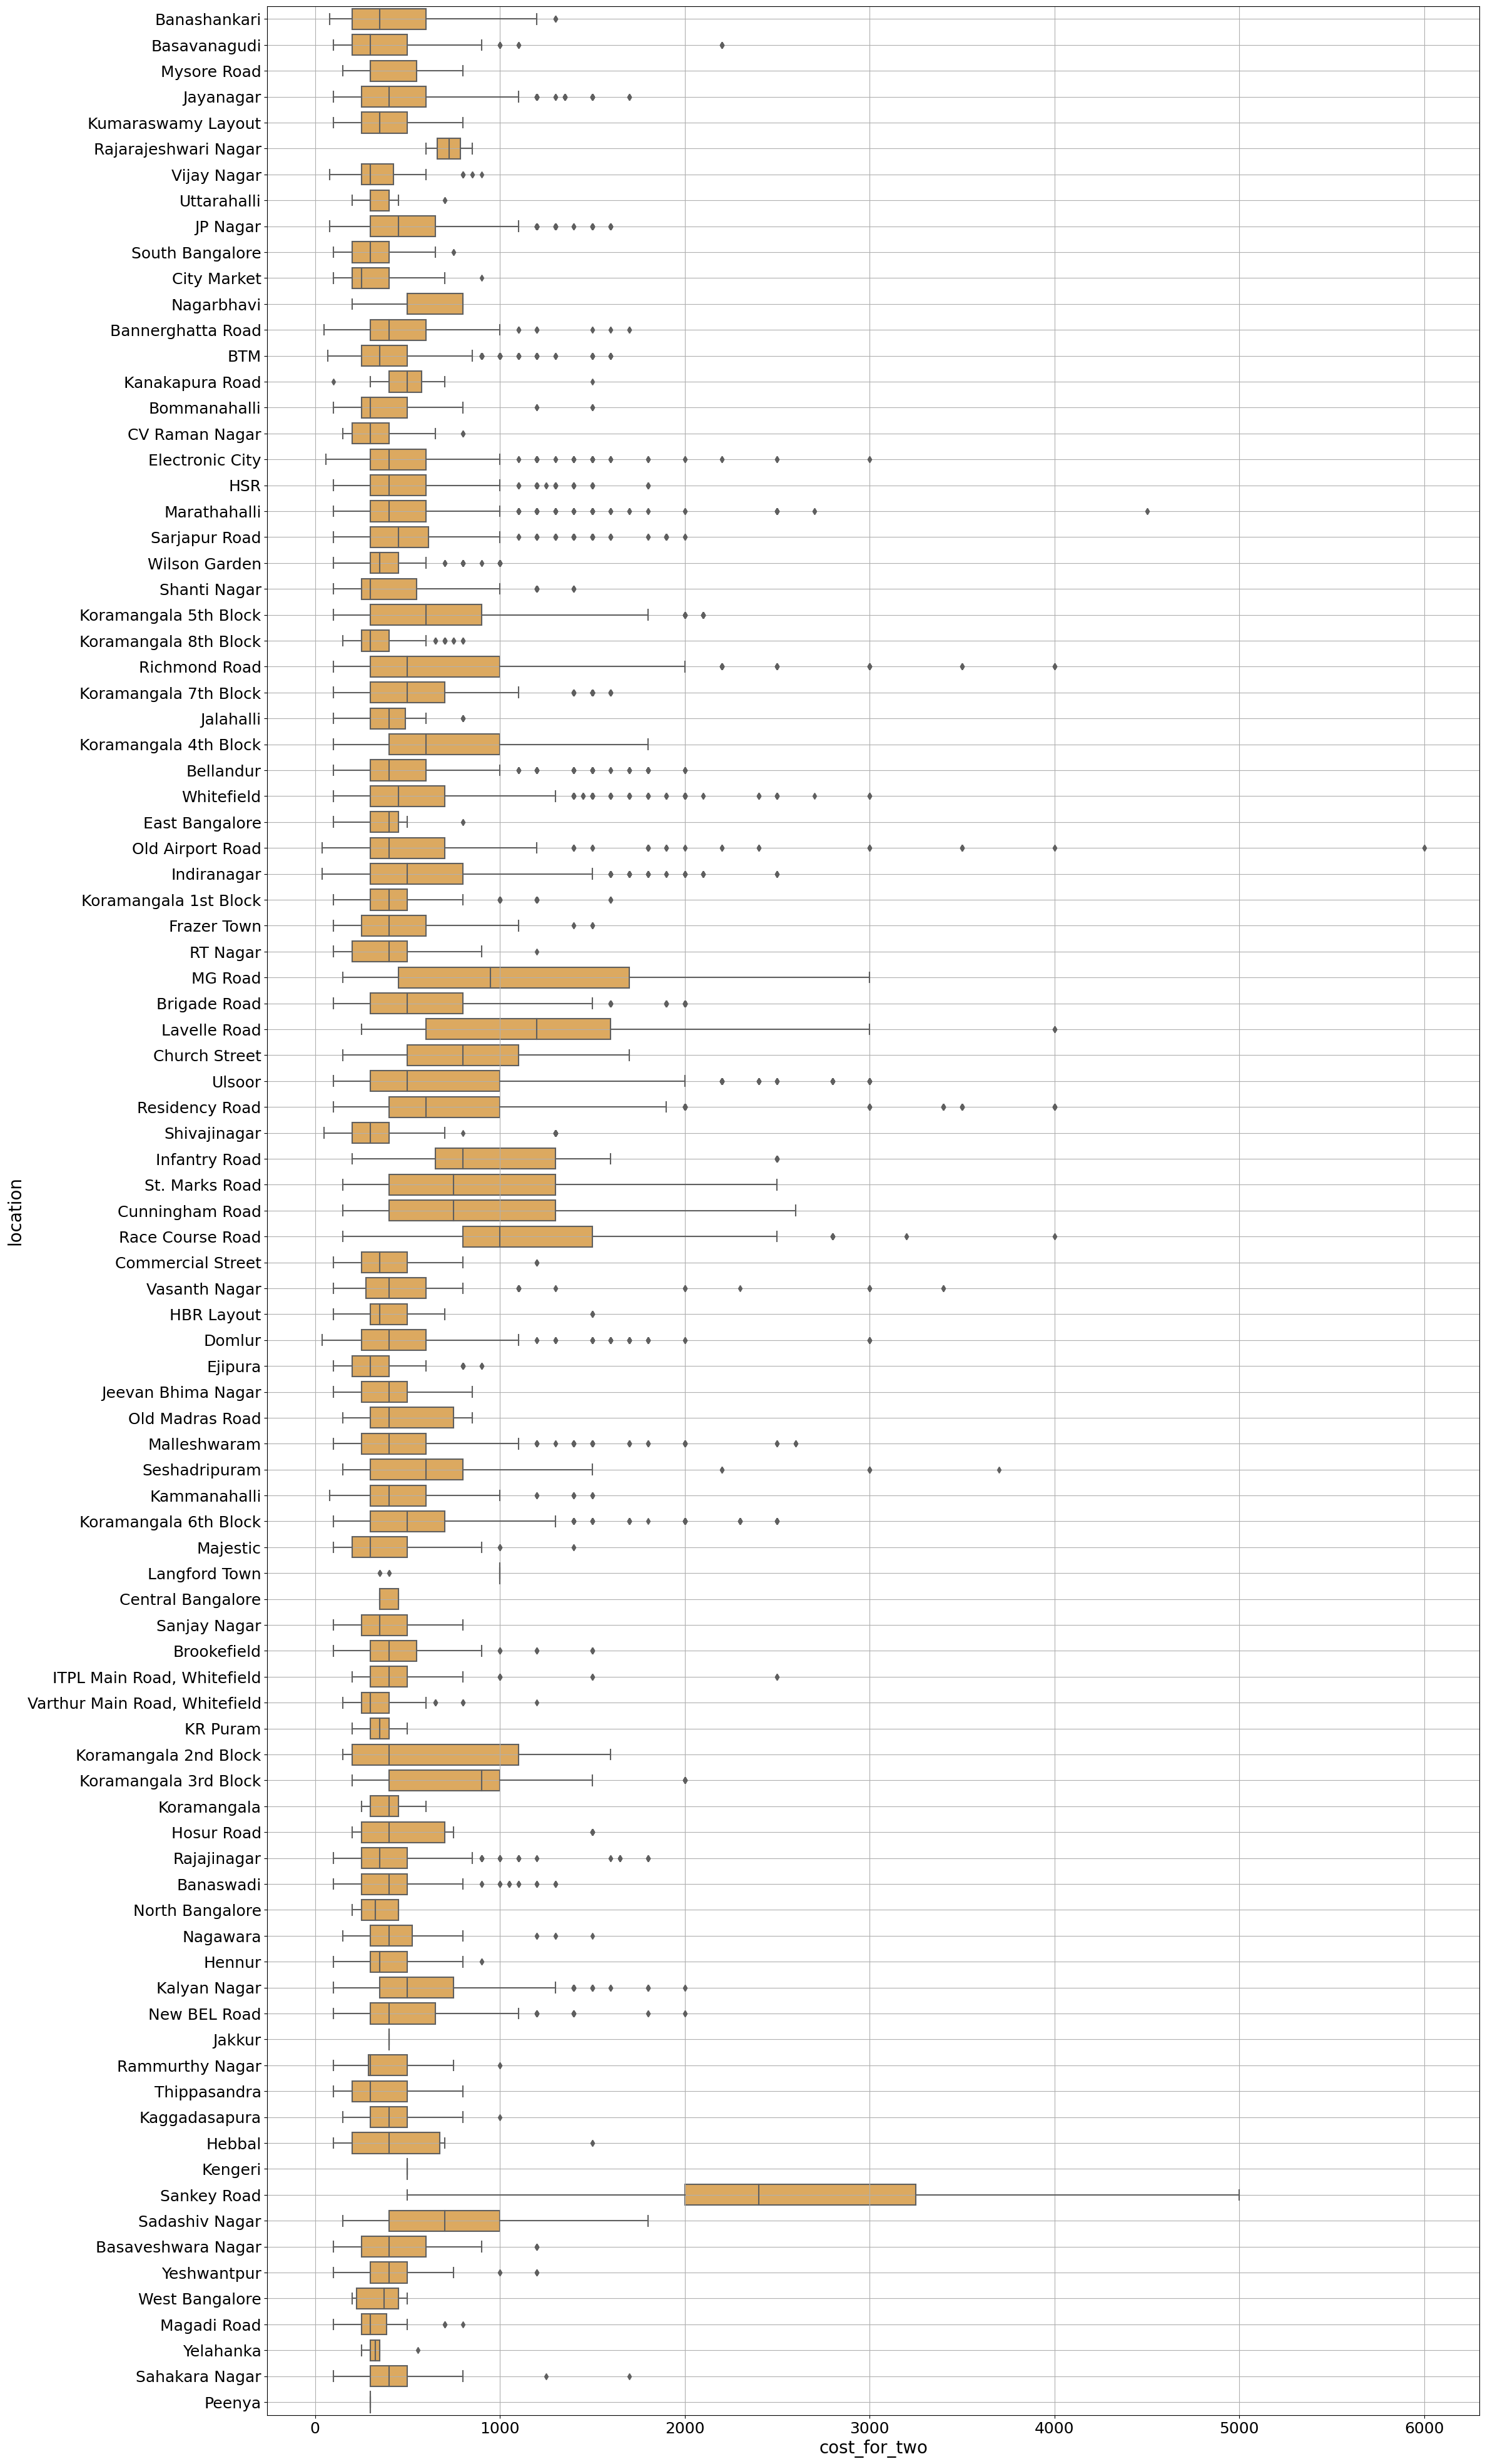

In [214]:
fig, ax = plt.subplots(1, 1, figsize = (25, 50))
b = sns.boxplot(data=zmt, x='cost_for_two', y='location', orient='h', ax=ax, color='#F1AD4B')
b.tick_params(labelsize=18)
plt.xlabel('cost_for_two', fontsize=20)
plt.ylabel('location', fontsize=20)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

_Color Theory:_  
Here I used semantic color close to golden symbolizing money. It's better to not separate boxplots by color as they are already in seperate rows showing different categories.

_The most expensive location in Bangalore_  
* Sankey Road - **75%** of restaurants have **cost for two >= 2000** (The most expensive city)
* Race Course Road - **50%** of restaurants have **cost for two >= 1000**
* MG Road - **Nearly 50%** of restaurants have **cost for two >= 1000**
* Lavelle Road - **More then 60%** of restaurants have **cost for two >= 1000** 


In [224]:
# locations with most expensive cost_for_two
avg_cost_for_two = zmt.groupby('location')['cost_for_two'].mean().sort_values(ascending=False)
avg_cost_for_two

location
Sankey Road         2505.555556
Race Course Road    1309.352518
Lavelle Road        1306.427894
MG Road             1161.759153
Infantry Road       1060.666667
                       ...     
South Bangalore      330.186916
Ejipura              320.539375
CV Raman Nagar       311.235955
City Market          302.368000
Peenya               300.000000
Name: cost_for_two, Length: 93, dtype: float64

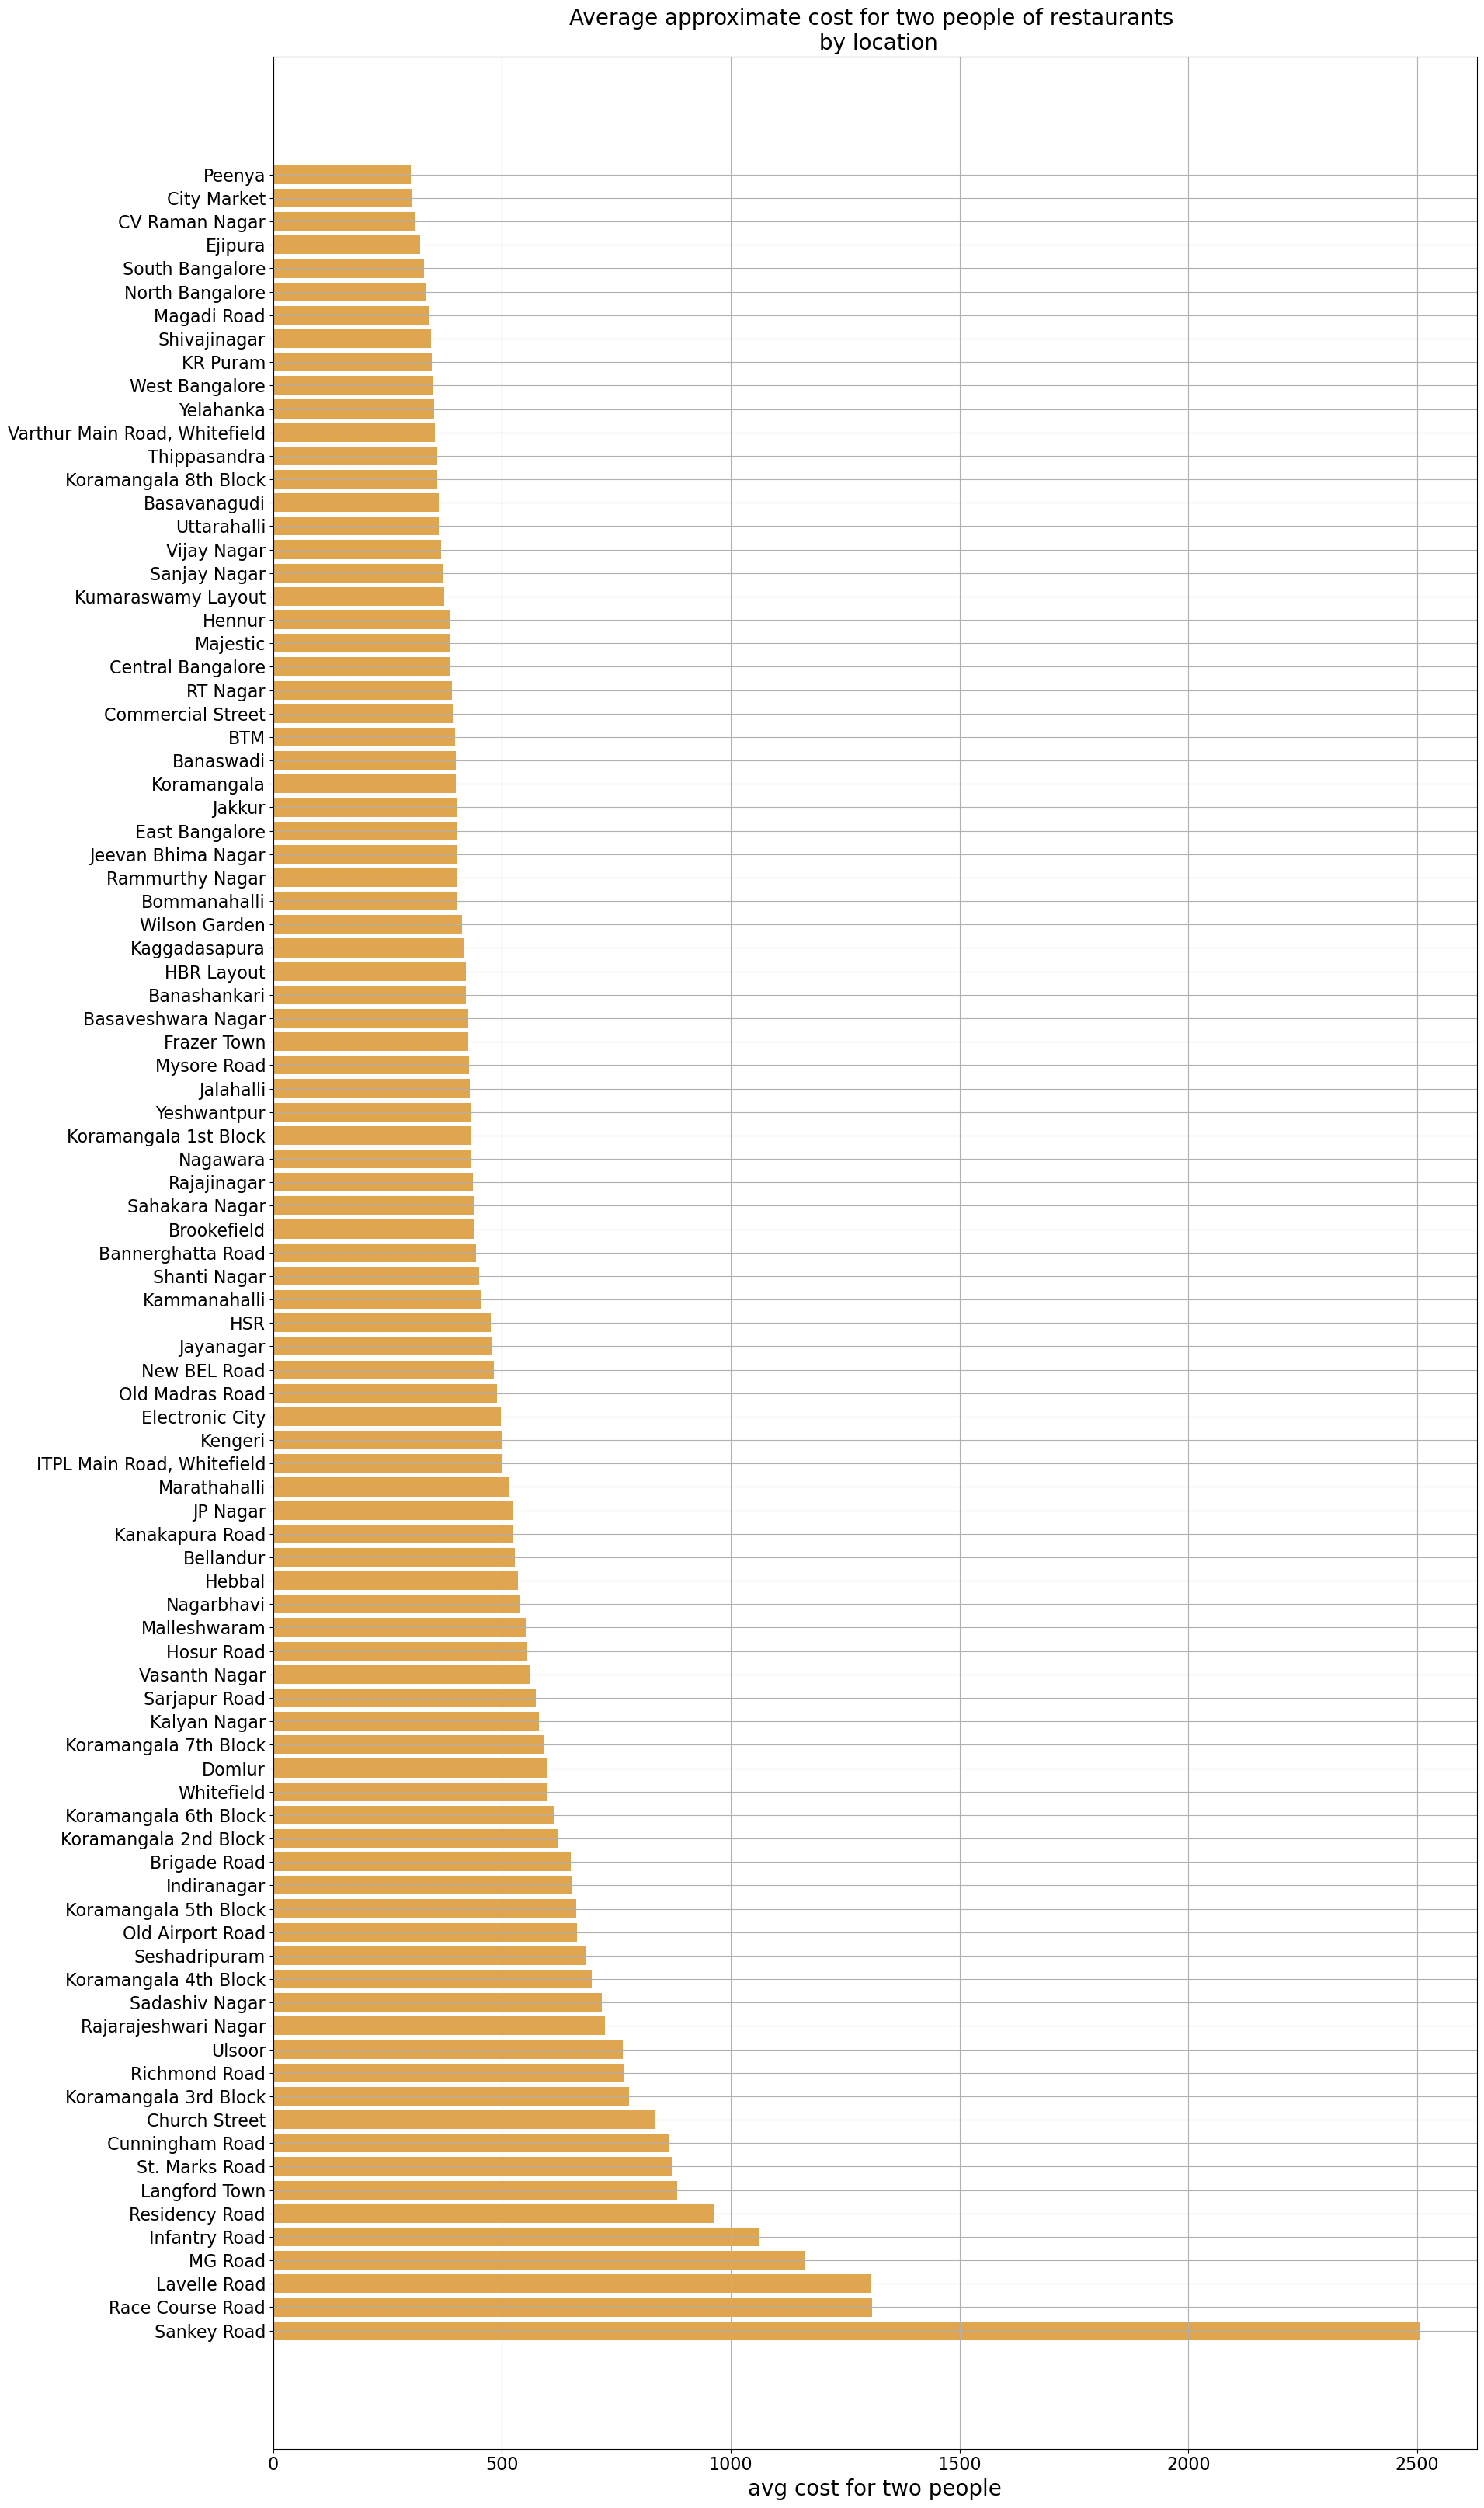

In [225]:
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=avg_cost_for_two.index, width=avg_cost_for_two.values, color='#E0A54F')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_title('Average approximate cost for two people of restaurants \n by location', fontdict={'fontsize':20})
ax.set_xlabel('avg cost for two people', fontdict={'fontsize':20})
plt.show()

_Color Theory:_  
I used the same color as the graph expresses the same type of information most expensive or cheap locations

 _Top 5 expensive locations of Bangalore by average cost for two people:_  
 1. Sankey Road   
 2. Race Course Road
 3. Lavelle Road
 4. MG Road
 5. Infantry Road  
 
 _5 cheapest locations of Bangalore by average cost for two people:_  
 1. Peenya
 2. City Market
 3. CV Raman Nagar
 4. Ejipura
 5. South Bangalore